<h2><font color='#a762bc'><b>An Analysis of Palmer Penguins</b></font></h2>
<h6><b>Author: Mark Gallagher</b></h6>

***

#### <font color='#047374'><b>Table of contents</b></font><a class='anchor' id='top'></a>
- [Section 1: Introduction](#chapter1)
- [Section 2: Import Libraries](#chapter2)
- [Section 3: Load the Data](#chapter3)
- [Section 4: Inspect the Data](#chapter4)
- [Section 5: Data Variables (An Overview)](#chapter5)
- [Section 6: Data Visualisation (Histogram)](#chapter6)
- [Section 7: Data Visualisation (Bar Chart)](#chapter7)
- [Section 8: Data Visualisation - Two Variable Plot](#chapter8)

> **Warning:** This table of contents was working for me previously

###### <b>source: [How to Add a Table of Contents in the Jupyter Notebook](https://www.geeksforgeeks.org/how-to-add-a-table-of-contents-in-the-jupyter-notebook/)</b>

***

#### <a class="anchor" id="chapter1"><b>Section 1: Introduction</b></a>

This notebook contains my analysis of the famous Palmer Penguins dataset.

<img src="https://r.qcbs.ca/workshop03/book-en/images/palmerpenguins.png" width=150>

<sub><b>Figure 1.1: Artwork by [Allison Horst](https://twitter.com/allison_horst)</b></sub> 
<br><br>
The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/) and contains size measurements for three species of penguins, that were observed across three islands in the Palmer Archipelago, Antartica.

The data was collected by [Dr. Kristen Gorman](https://gormankb.github.io/) between 2007-2009 with the Palmer Station Long Term Ecological Research Program [LTER](https://pallter.marine.rutgers.edu/).


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=450>

<sub><b>Figure 1.2: Artwork by [Allison Horst](https://twitter.com/allison_horst)</b></sub> 

***

#### <a class="anchor" id="chapter2"><b>Section 2: Import Libraries</b></a>

The first step is importing the necessary libraries. For this project, I will be using the following:

<ol>
<li><b>pandas:</b> data manipulation library in Python, providing data structures and functions needed to manipulate and analyse structured data</li>
<li><b>numpy:</b> for numerical computing in Python</li>
<li><b>matplotlib:</b> a plotting library for Python for creating plots and visualisations.</li>
</ol>

These libraries will allow me to thoroughly investigate the data (and associated csv files) amongst other features.

In [321]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***

#### <a class="anchor" id="chapter3"><b>Section 3: Load the Data</b></a>

Importing data is the first step in any data science project. Let's load the palmerpenguin data, and validate it by viewing the first 5 rows.

In [322]:
# Read the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# View the first 5 rows
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


###### <b>source: [pandas read csv() Tutorial: Importing Data](https://www.datacamp.com/tutorial/pandas-read-csv)</b>

***

#### <a class="anchor" id="chapter4"><b>Section 4: Inspect the Data</b></a>

##### <b>4.1. Data summary</b>

In [323]:
df.info() # Prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


###### <b>source: [Pandas DataFrame info() Method](https://www.w3schools.com/python/pandas/ref_df_info.asp)</b>

##### <b>4.2. Counting values</b>

In [324]:
df.count() # Counts the number of not empty values for each row

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

This count allows us to quickly check if there's 'null' or missing values associated to any of the penguins attributes.
<br>
###### <b>source: [Pandas DataFrame count() Method](https://www.w3schools.com/python/pandas/ref_df_count.asp)</b>

##### <b>4.3. Cleaning empty cells</b>

In [325]:
df = df.dropna() # Will update the Data Frame with no empty cells

Removing a few rows with empty cells will not have a big impact on the result of the analysis. 

###### <b>source: [Pandas - Cleaning Empty Cells](https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)</b>

##### <b>4.4. Selecting first row</b>

In [326]:
# We can now look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

###### <b>source: [Pandas DataFrame iloc Property](https://www.w3schools.com/python/pandas/ref_df_iloc.asp)</b>

##### <b>4.5. Value counts (Sex)</b>

In [327]:
# Count the number of penguins of each sex.
df['sex'].value_counts() # Count the number of unique values (i.e. Sex) in the data set

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

###### <b>source: [Pandas Index.value_counts()](https://www.geeksforgeeks.org/python-pandas-index-value_counts/)</b>

##### <b>4.6. Unique values</b>

Now we will inspect the values in each of the columns, and get a count

In [328]:
for val in df:
    print(df[val].value_counts())
    print()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

bill_length_mm
41.1    7
45.2    6
50.5    5
39.6    5
45.5    5
       ..
35.6    1
37.5    1
36.8    1
43.1    1
49.9    1
Name: count, Length: 163, dtype: int64

bill_depth_mm
17.0    12
18.5    10
18.6    10
17.9    10
15.0    10
        ..
20.1     1
20.6     1
14.9     1
13.2     1
20.8     1
Name: count, Length: 79, dtype: int64

flipper_length_mm
190.0    21
195.0    17
187.0    16
193.0    14
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
230.0     7
181.0     7
189.0     7
192.0     7
184.0     7
212.0     7
213.0     6
201.0     6
216.0     6
222.0     6
186.0     6
199.0     6
188.0     6
209.0     5
194.0     5
214.0     5
203.0     5
219.0     5
221.0     5
218.0     5
217.0     5
225.0     4
178.0     4
200.0     4
228.0     4
202.0     4
180.

##### <b>4.7. Descriptive statistics</b>

In [329]:
# Describe the data set.
df.describe() # Returns a description of the data in the DataFrame

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Explanation of the description of numerical columns
<ul>
<li><b>count:</b> total number of non-empty values</li>
<li><b>mean:</b> mean of the column values</li>
<li><b>std:</b> standard deviation of the column values</li>
<li><b>min:</b> minimum value from the column</li>
<li><b>25%:</b> 25 percentile</li>
<li><b>50%:</b> 50 percentile</li>
<li><b>75%:</b> 75 percentile</li>
<li><b>max:</b> maximum value from the column</li>
</ul>

###### <b>source: [Pandas DataFrame describe() Method](https://www.w3schools.com/python/pandas/ref_df_describe.asp)</b>

##### <b>4.8. Sorting data</b>

We can sort the source data by specific variables to make it easy to read and scan.

In [330]:
# Sort by 'Island' (display first 5 rows)
df.sort_values("island").head(5) # Sorts the DataFrame by the specified label

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
113,Adelie,Biscoe,42.2,19.5,197.0,4275.0,MALE
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
115,Adelie,Biscoe,42.7,18.3,196.0,4075.0,MALE


###### <b>source: [Pandas DataFrame sort_values() Method](https://www.w3schools.com/python/pandas/ref_df_sort_values.asp)</b>

***

#### <a class="anchor" id="chapter5"><b>Section 5: Data Variables (An Overview)</b></a>

Let's take a closer look at the types of variables included in this data set. This will allow us to determine which variables will be best suited for the subsequent analysis.

In [331]:
df.dtypes # Returns the data type of each column in the DataFrame

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

##### <b>5.1. Variable names</b>

There are 7 variables included in this data set, including:
<ol>
<li><b>species:</b> penguin species (Chinstrap, Adélie, or Gentoo)</li>
<li><b>islands:</b> island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)</li>
<li><b>bill_length_mm:</b> bill length</li>
<li><b>bill_depth_mm:</b> bill depth</li>
<li><b>flipper_length_mm:</b> flipper length (mm)</li>
<li><b>body_mass_g:</b> body mass (g)</li>
<li><b>sex:</b> penguin sex</li>
</ol>

###### <b>source: [Pandas DataFrame dtypes Property](https://www.w3schools.com/python/pandas/ref_df_dtypes.asp)</b>

##### <b>5.2. Variable types</b>

The above variables can be categorised as follows:
<ol>
<li><b>Factor variables</b>: 'species', 'island' and 'sex', which are important for grouping the data with colour, shapes, and other aesthetics in a plot.</li>
<li><b>Numeric variables</b>: 'bill_length_mm' and 'bill_depth_mm'</li>
<li><b>Integer variables</b>: 'flipper_length_mm' and 'body_mass_g'</li>
<li><b>Temporal component</b>: 'year' spanning the years from 2007 to 2009</li>
</ol>

###### <b>source: [Chapter 6 The basics of visualizing data](https://r.qcbs.ca/workshop03/book-en/the-basics-of-visualizing-data.html#todays-dataset-palmerpenguins)</b>

***

#### <a class="anchor" id="chapter6"><b>Section 6: Data Visualisation (Histogram)</b></a>

The histogram plot shows the distribution of the data. You can use the histogram plot to see the distribution of one or more variables. 

##### <b>6.1. Body Mass (g)</b>

<function matplotlib.pyplot.show(close=None, block=None)>

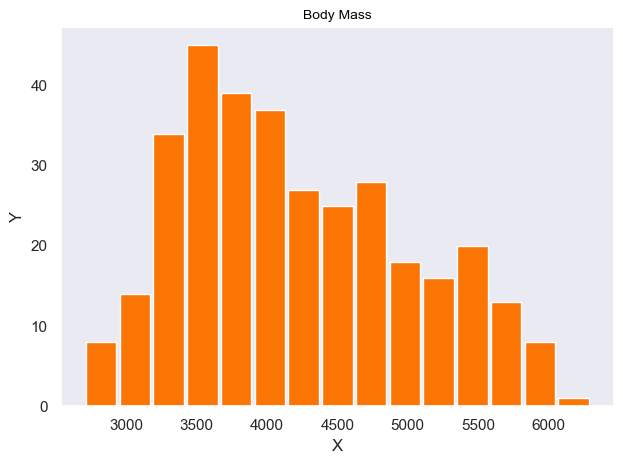

In [332]:
# Step 1: Select the specific column (of data) to create the histrogram
df.hist(column='body_mass_g', bins=15, color='#fb7504', rwidth=0.9, grid=False, )

# Step 2: Apply labels and styling to the chart
plt.title("Body Mass", size=10, color="#060505")
plt.xlabel('X')
plt.ylabel('Y') 
plt.tight_layout()

# Step 3: Display the chart
plt.show

###### source: [Creating Histograms using Pandas](https://mode.com/example-gallery/python_histogram)

##### <b>6.2. Body Mass (By Species)</b>

The pandas hist() function allows us to create separate subplots for different groups of data. This is achieved by passing a column to the 'by' parameter. 
<br><br>
Let's give it the [old college try](https://www.merriam-webster.com/dictionary/give%20it%20the%20old%20college%20try#:~:text=%3A%20to%20use%20one's%20very%20best,it%20the%20old%20college%20try!).

array([[<Axes: title={'center': 'Adelie'}>,
        <Axes: title={'center': 'Chinstrap'}>],
       [<Axes: title={'center': 'Gentoo'}>, <Axes: >]], dtype=object)

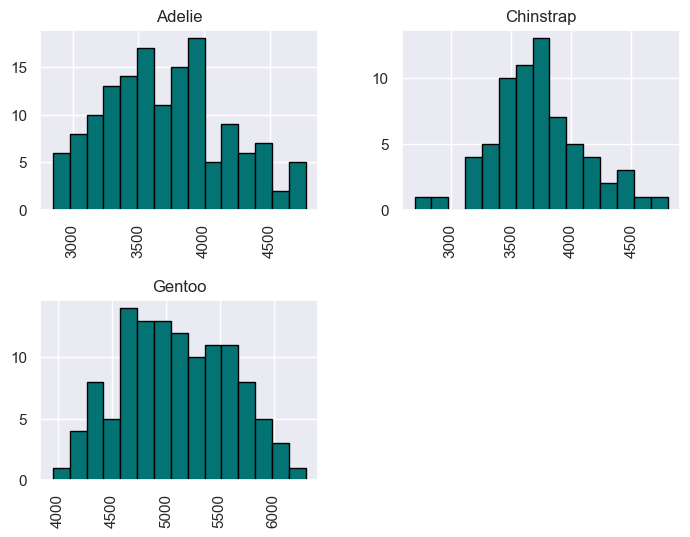

In [333]:
# Step 1: Select the specific column and groupings
df['body_mass_g'].hist(by=df['species'], bins=15, color='#047374', edgecolor='black', figsize = (8,6))

###### <b>source: [Creating Histograms using Pandas](https://mode.com/example-gallery/python_histogram)<b>
###### <b>source: [How to Plot Histograms by Group in Pandas](https://www.statology.org/pandas-histogram-by-group/)<b>

***

#### <a class="anchor" id="chapter7"><b>Section 7: Data Visualisation (Bar Chart)</b></a>

In [334]:
# Step 1: Count Penguin Species
species_counts = df['species'].value_counts() # Creates a new variable

In [335]:
# Step 2:  Define the bar (bin) colours
colors = ['#fb7504', '#047374', '#c65ccc']

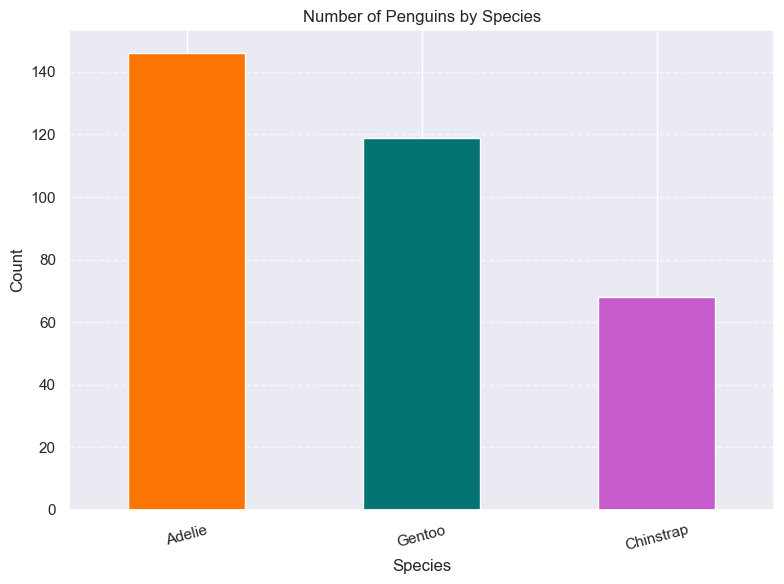

In [336]:
# Step 3: Plotting and Styling the Bar Chart
plt.figure(figsize=(8, 6)) # Create a new figure with a specified size
species_counts.plot(kind='bar', color=colors)
plt.title('Number of Penguins by Species') # Set the title of the chart
plt.xlabel('Species') # Label for the x-axis
plt.ylabel('Count') # Label for the y-axis
plt.xticks(rotation=15) # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis
plt.tight_layout() # Adjust the padding between and around subplots

# Step 4: Display the plot
plt.show()

###### <b>source: [Make Better Bar Charts in Python using Pandas Plot](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/)</b>

***

#### <a class="anchor" id="chapter8"><b>Section 8: Data Visualisation (Two Variable Plot)</b></a>

##### <b>8.1. Flipper length (mm) vs. Bill length (mm)</b>

In [337]:
# Get just the flipper length
flen = df['flipper_length_mm'] # Create a new variable for flipper length

# Show the Dats
print(flen) # Display (print) the data

# Show the Type
print(type(flen)) # Display the data type

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
338    214.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 333, dtype: float64
<class 'pandas.core.series.Series'>


In [338]:
# Get just the flipper length
blen = df['bill_length_mm'].to_numpy() # Create variable for flipper length and

# Show the data
blen

array([39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6,
       38.7, 42.5, 34.4, 46. , 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6,
       40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2,
       37.6, 39.8, 36.5, 40.8, 36. , 44.1, 37. , 39.6, 41.1, 36. , 42.3,
       39.6, 40.1, 35. , 42. , 34.5, 41.4, 39. , 40.6, 36.5, 37.6, 35.7,
       41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7,
       39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7,
       35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34. , 39.6,
       36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35. , 41. , 37.7, 37.8, 37.9,
       39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7,
       38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8,
       41.5, 39. , 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2,
       37. , 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39. , 39.2, 36.6, 36. ,
       37.8, 36. , 41.5, 46.5, 50. , 51.3, 45.4, 52

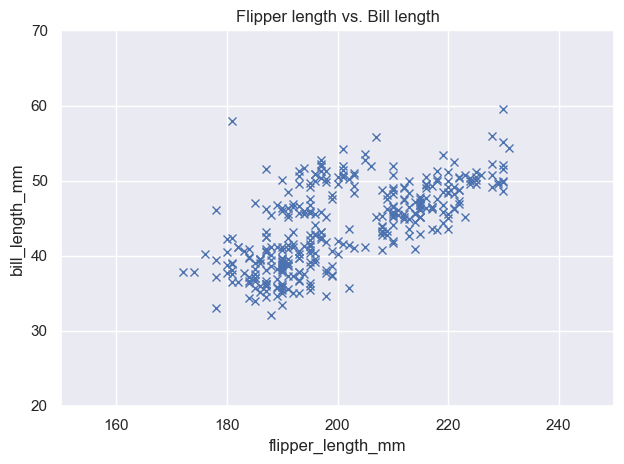

In [339]:
# Simple Plot
plt.plot(flen, blen, 'x')

# Add Axis Labels

plt.xlabel('flipper_length_mm')
plt.ylabel('bill_length_mm')

# Add a Title
plt.title('Flipper length vs. Bill length')

# Set the X Limits
plt.xlim(150, 250) # Adjusting limits for optimal plot view

# Set the Y Limits
plt.ylim(20, 70) # Adjusting limits for optimal plot view

plt.tight_layout() # Adjust the padding between and around subplots

##### <b>Section 8.1.1: Add a Best Fit Line (Flipper Length vs. Bill Length)</b>

$ y = mx + c = p_1 x^1 + p_0 = p1 x + p_0$

In [340]:
# Fit a straight line betwee x and y
b, a = np.polyfit(flen, blen, deg=1)

# Show m and c.
b, a

(0.25482471848215243, -7.218557988776602)

(20.0, 70.0)

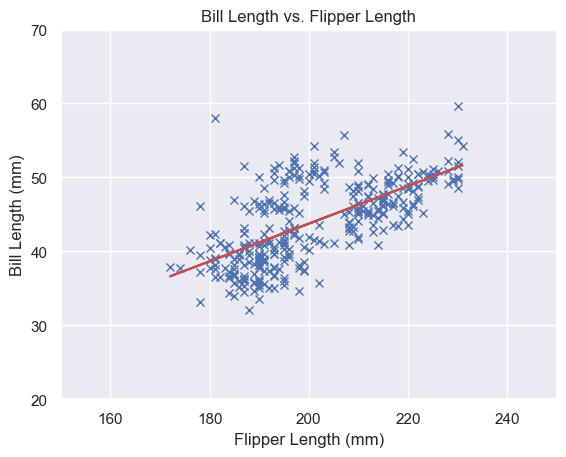

In [341]:
# Create a new figure and set of axis
fig, ax = plt.subplots()

# Simple Plot
ax.plot(flen, blen, 'x')

# Simple Plot
ax.plot(flen, b * flen + a, 'r-')

# Add Axis labels
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Bill Length (mm)')

# Title
ax.set_title('Bill Length vs. Flipper Length')

# Set X Limits
ax.set_xlim(150, 250)

# Set Y Limits
ax.set_ylim(20, 70)

##### <b>Section 8.1.2: Correlation Coefficient (Flipper Length vs. Bill Length)</b>

In [342]:
# Measure the correlation

np.corrcoef(flen, blen) # create correlation matrix

array([[1.        , 0.65309564],
       [0.65309564, 1.        ]])

<sub><b>Value of correlation</b>: 0.65309564</sub>

<sub><b>Analysis</b>: This correlation matrix indicates a <u>moderate positive correlation</u> between 'flipper_length' and 'bill_length'. This means that penguins with a larger 'flipper length' will tend to have longer 'bill lengths'. Similarly, as the length of one variable decreases, the other variable tends to decrease. 

###### <b>source: [Create a correlation Matrix using Python](https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/)</b>

***

##### <b>Section 8.2: Body mass (g) vs. Flipper length (mm)</b>

In [343]:
# Get the Penguin (Body) Mass

pmass = df['body_mass_g']

# Show the Data
print(pmass)

# Show the Data Type
print(type(pmass))

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 333, dtype: float64
<class 'pandas.core.series.Series'>


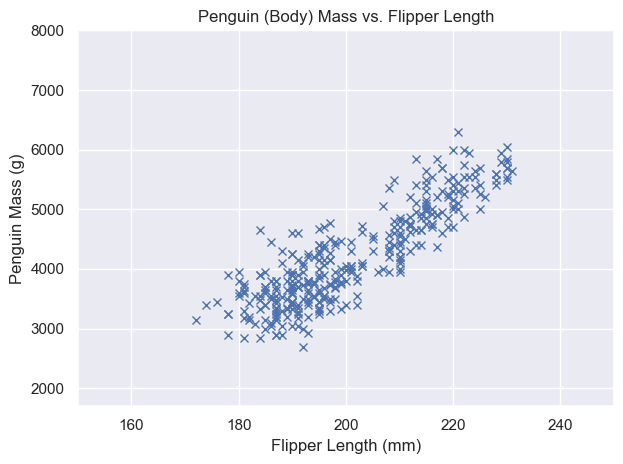

In [344]:
# Simple Plot

plt.plot(flen, pmass, 'x')

# Add Axis labels
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Penguin Mass (g)')

# Title
plt.title('Penguin (Body) Mass vs. Flipper Length')

# Set X Limits
plt.xlim(150, 250)

# Set Y Limits
plt.ylim(1700, 8000)

plt.tight_layout() # Adjust the padding between and around subplots

##### <b>Section 8.2.1: Add a Best Fit Line (Flipper Length vs. Bill Length)</b>

$ y = mx + c = p_1 x^1 + p_0 = p1 x + p_0$

In [345]:
# Fit a straight line betwee x and y
b, a = np.polyfit(flen, pmass, deg=1)

# Show m and c.
b, a

(50.15326594224115, -5872.0926828428255)

(1700.0, 8000.0)

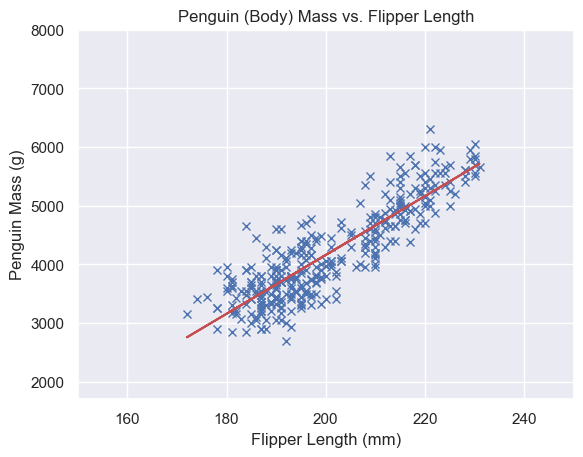

In [346]:
# Create a new figure and set of axis
fig, ax = plt.subplots()

# Simple Plot
ax.plot(flen, pmass, 'x')

# Simple Plot
ax.plot(flen, b * flen + a, 'r-')

# Add Axis labels
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Penguin Mass (g)')

# Title
ax.set_title('Penguin (Body) Mass vs. Flipper Length')

# Set X Limits
ax.set_xlim(150, 250)

# Set Y Limits
ax.set_ylim(1700, 8000)

###### <b>source: [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)</b>

##### <b>Section 8.2.2: Correlation Coefficient (Flipper Length vs. Body Mass)</b>

In [347]:
# Measure the correlation

np.corrcoef(pmass, flen) # create correlation matrix

array([[1.       , 0.8729789],
       [0.8729789, 1.       ]])

<sub><b>Value of correlation</b>: 0.8729789</sub>

<sub><b>Analysis</b>: This correlation matrix indicates a <u>relatively strong, positive correlation</u> between 'flipper_length' and 'body_mass'. This means that penguins with a larger 'body mass' will have longer 'bill lengths'. 

###### <b>source: [Create a correlation Matrix using Python](https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/)</b>

***

### End


<img src="https://pbs.twimg.com/media/Ed8VOUyU8AI8gky?format=png&name=4096x4096" width=150>

<sub>Figure 1.3: Artwork by [Allison Horst](https://twitter.com/allison_horst)</sub> 